# Tugas Akhir

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import pickle

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
#Import dataset
employee_data = pd.read_excel('dataset_employee.xlsx')
employee_data

,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,80589,Sales & Marketing,wilayah_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,80292,Operations,wilayah_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,22664,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,17693,Sales & Marketing,wilayah_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,64096,Technology,wilayah_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,18181,Technology,wilayah_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,89743,Operations,wilayah_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,29069,Analytics,wilayah_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,28765,Sales & Marketing,wilayah_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [3]:
employee_data.shape

(54808, 14)

In [4]:
#Inspecting table
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_karyawan              54808 non-null  int64  
 1   departemen               54808 non-null  object 
 2   wilayah                  54808 non-null  object 
 3   pendidikan               52399 non-null  object 
 4   jenis_kelamin            54808 non-null  object 
 5   rekrutmen                54808 non-null  object 
 6   jumlah_training          54808 non-null  int64  
 7   umur                     54808 non-null  int64  
 8   rating_tahun_lalu        50684 non-null  float64
 9   masa_kerja               54808 non-null  int64  
 10  KPI_>80%                 54808 non-null  int64  
 11  penghargaan              54808 non-null  int64  
 12  rata_rata_skor_training  54808 non-null  int64  
 13  dipromosikan             54808 non-null  int64  
dtypes: float64(1), int64(8

In [5]:
employee_data.describe()

,id_karyawan,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,54346.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,15152.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,34820.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,54376.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,73881.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,93449.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


## Data Cleansing

In [6]:
#Inspecting missing values
employee_data.isnull().sum()

id_karyawan                   0
departemen                    0
wilayah                       0
pendidikan                 2409
jenis_kelamin                 0
rekrutmen                     0
jumlah_training               0
umur                          0
rating_tahun_lalu          4124
masa_kerja                    0
KPI_>80%                      0
penghargaan                   0
rata_rata_skor_training       0
dipromosikan                  0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

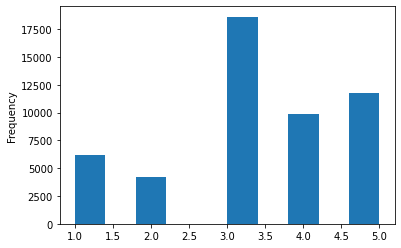

In [7]:
# Distribution of rating_tahun_lalu column
employee_data['rating_tahun_lalu'].plot.hist(stacked = True)

C:\Users\LENOVO\anaconda3\envs\tensorenviron\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating_tahun_lalu', ylabel='Density'>

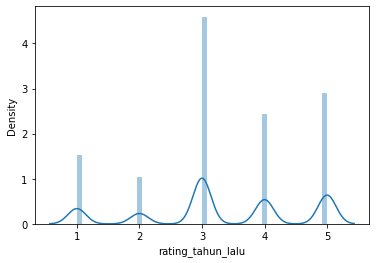

In [8]:
# Distribution of rating_tahun_lalu column
sns.distplot(employee_data['rating_tahun_lalu'])

C:\Users\LENOVO\anaconda3\envs\tensorenviron\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\envs\tensorenviron\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\envs\tensorenviron\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

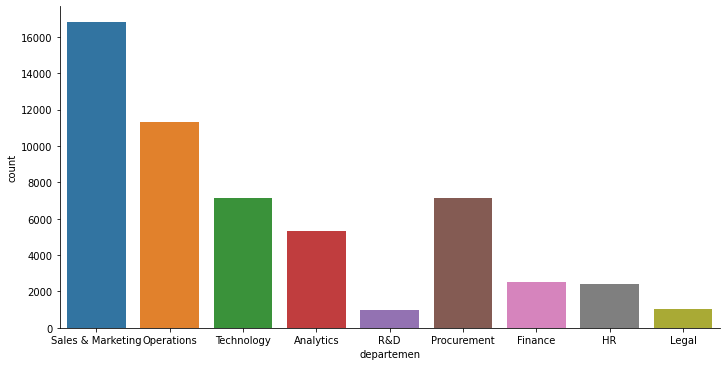

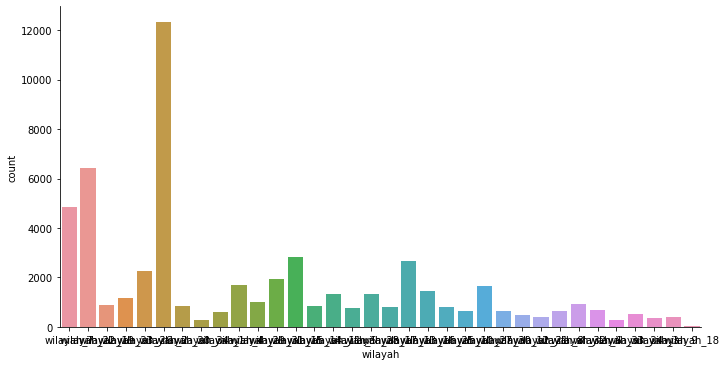

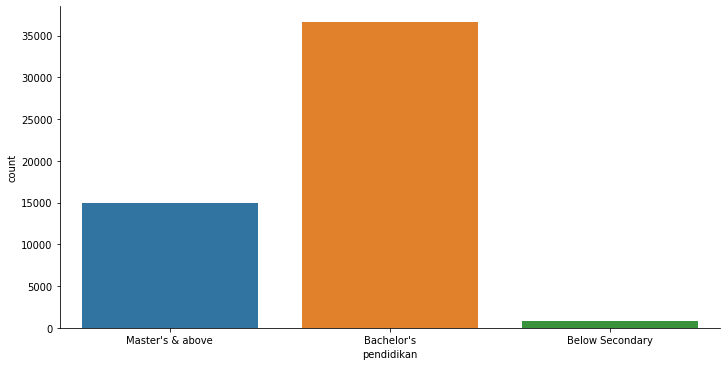

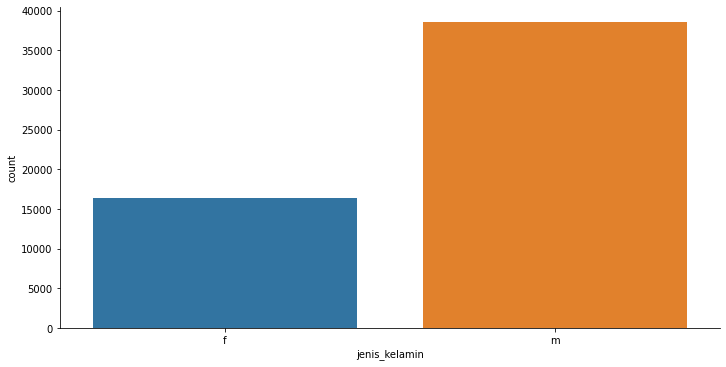

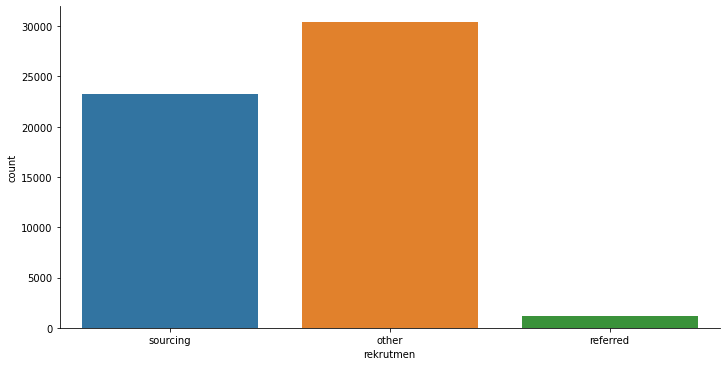

In [9]:
# Plotting categorical variable
for kolom in employee_data.select_dtypes('object'):
    sns.catplot(kolom, kind='count', orient='v', data=employee_data, aspect=2);

In [10]:
employee_data['rating_tahun_lalu'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: rating_tahun_lalu, dtype: int64

In [11]:
# Filling NA values in 'rating_tahun_lalu' column with median
employee_data['rating_tahun_lalu'] = employee_data['rating_tahun_lalu'].fillna(employee_data['rating_tahun_lalu'].median(skipna=True))

In [12]:
# Filling NA values in 'pendidikan' column with most frequent data
employee_data['pendidikan'] = employee_data['pendidikan'].fillna("Bachelor's")

In [13]:
# Checking missing values info
employee_data.isnull().sum()

id_karyawan                0
departemen                 0
wilayah                    0
pendidikan                 0
jenis_kelamin              0
rekrutmen                  0
jumlah_training            0
umur                       0
rating_tahun_lalu          0
masa_kerja                 0
KPI_>80%                   0
penghargaan                0
rata_rata_skor_training    0
dipromosikan               0
dtype: int64

In [14]:
employee_data[employee_data['dipromosikan']==1]['wilayah'].value_counts()

wilayah_2     989
wilayah_22    734
wilayah_7     516
wilayah_4     246
wilayah_13    230
wilayah_15    222
wilayah_28    154
wilayah_26    143
wilayah_23    137
wilayah_27    131
wilayah_31    110
wilayah_17    109
wilayah_25    103
wilayah_16    102
wilayah_11     74
wilayah_14     62
wilayah_30     59
wilayah_1      58
wilayah_19     53
wilayah_8      53
wilayah_10     51
wilayah_20     49
wilayah_29     43
wilayah_32     40
wilayah_3      37
wilayah_5      35
wilayah_12     33
wilayah_6      32
wilayah_24     18
wilayah_21     18
wilayah_33     10
wilayah_9       8
wilayah_34      8
wilayah_18      1
Name: wilayah, dtype: int64

## Exploratory Data Analysis

#### How is the distribution variable target? Imbalance or not?

In [15]:
#Checking target column
employee_data['dipromosikan'].value_counts()

0    50140
1     4668
Name: dipromosikan, dtype: int64

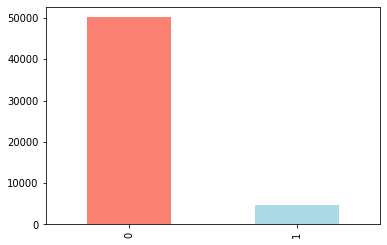

In [16]:
#Plot the target column with a bar chart
employee_data.dipromosikan.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

From the chart above we know that our dataset is imbalanced. It means we need to handle the imbalanced data to make a good machine learning model. 

#### How is the distribution of age? Does age having much influence to get you promoted?

C:\Users\LENOVO\anaconda3\envs\tensorenviron\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\envs\tensorenviron\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


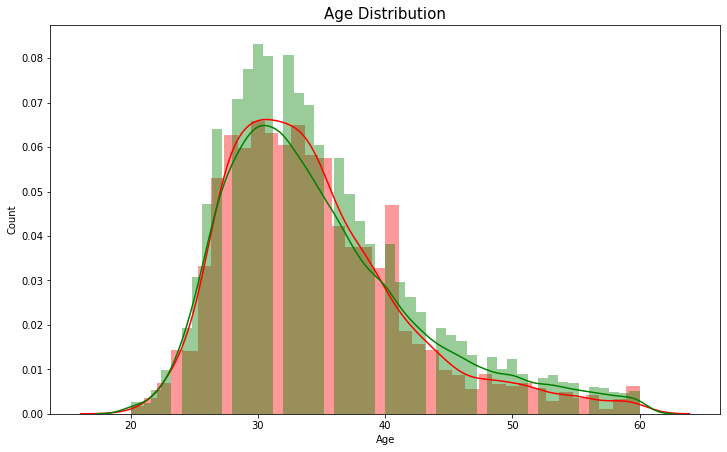

In [17]:
# Create a distribution plot
employee_promotion = employee_data[employee_data['dipromosikan'] == 1]
employee_no_promotion = employee_data[employee_data['dipromosikan'] == 0]

fig, ax = plt.subplots( figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(employee_promotion['umur'], 
             color="r")
g1 = sns.distplot(employee_no_promotion['umur'],
             color='g')
g1.set_title('Age Distribution', fontsize=15)
g1.set_xlabel('Age')
g1.set_ylabel("Count")


plt.show()

We can infer that age distribution for the employee is mostly around at the age of 30

#### How is the correlation between promotion and KPI? Does having a good KPI means you will get promoted?

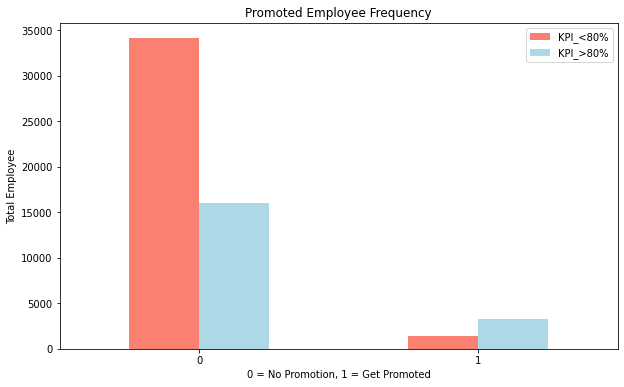

In [18]:
#Create a plot
pd.crosstab(employee_data['dipromosikan'], employee_data['KPI_>80%']).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);
#Add some attributes to it
plt.title('Promoted Employee Frequency')
plt.xlabel('0 = No Promotion, 1 = Get Promoted')
plt.ylabel('Total Employee')
plt.legend(["KPI_<80%", "KPI_>80%"])
plt.xticks(rotation=0);

There are no guarantees if you get KPI more than 80% you will get promotion easier. There are another factor like training score or last year rating that could be deciding factor. 

#### Does having a good last year rating give you more chance being promoted?

<AxesSubplot:>

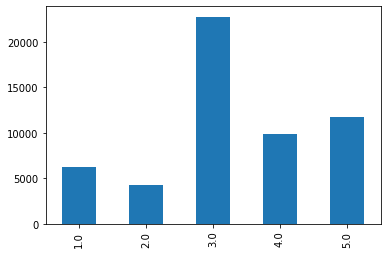

In [19]:
employee_data['rating_tahun_lalu'].value_counts().plot(kind='bar')

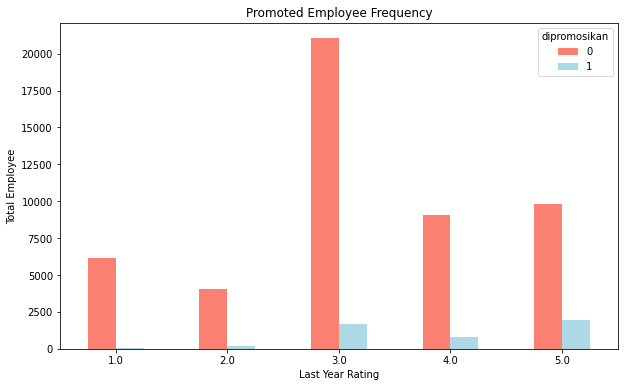

In [20]:
#Create a plot
pd.crosstab(employee_data.rating_tahun_lalu, employee_data.dipromosikan).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);
#Add some attributes to it
plt.title('Promoted Employee Frequency')
plt.xlabel('Last Year Rating')
plt.ylabel('Total Employee')
plt.xticks(rotation=0);

It looks like no guarantee you will get promotion if you have a good last year rating.

### How is the correlation between age, training score and promotion?

C:\Users\LENOVO\anaconda3\envs\tensorenviron\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


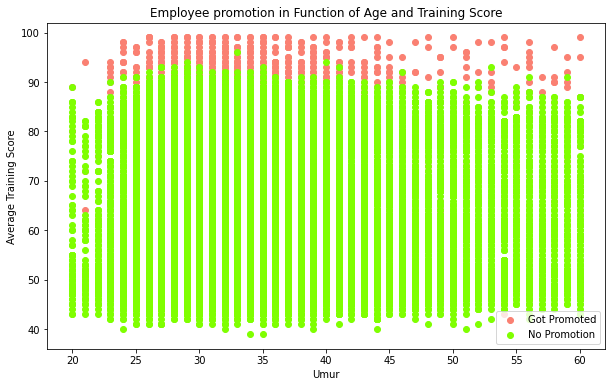

In [21]:
# Create another figure
plt.figure(figsize=(10,6))

# Create plot for person who got promoted
plt.scatter(employee_data.umur[employee_data.dipromosikan==1], 
            employee_data.rata_rata_skor_training[employee_data.dipromosikan==1], 
            c="salmon")

# Create plot for person who not to get promoted
plt.scatter(employee_data.umur[employee_data.dipromosikan==0], 
            employee_data.rata_rata_skor_training[employee_data.dipromosikan==0], 
            c='chartreuse')

# Add some helpful info
plt.title("Employee promotion in Function of Age and Training Score")
plt.xlabel("Umur")
plt.legend(["Got Promoted", "No Promotion"])
plt.ylabel("Average Training Score");

Based on scatter plot below, we can conclude employees who got promoted are mostly the one who got higher score on the training. We can infer form this plot that training score have big proportion to decide the employee got promoted or not.

#### How about correlation between last year rating, average training score and promotion?

C:\Users\LENOVO\anaconda3\envs\tensorenviron\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


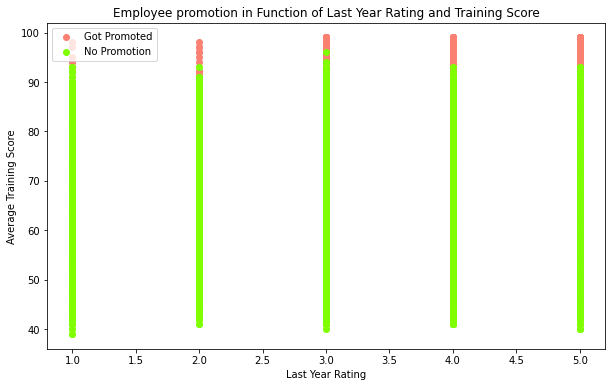

In [22]:
# Create another figure
plt.figure(figsize=(10,6))

# Create plot for person who get promoted 
plt.scatter(employee_data.rating_tahun_lalu[employee_data.dipromosikan==1], 
            employee_data.rata_rata_skor_training[employee_data.dipromosikan==1], 
            c="salmon") # axis always come as (x, y)

# Create plot for person who not to get promoted
plt.scatter(employee_data.rating_tahun_lalu[employee_data.dipromosikan==0], 
            employee_data.rata_rata_skor_training[employee_data.dipromosikan==0], 
            c='chartreuse')

# Add some helpful info
plt.title("Employee promotion in Function of Last Year Rating and Training Score")
plt.xlabel("Last Year Rating")
plt.legend(["Got Promoted", "No Promotion"])
plt.ylabel('Average Training Score');

Last year rating doesn't have enough proportion to decide employee who get promoted. Instead, it looks like the training score again that become the deciding factor.

#### Is the amount of total training could be the determining factor?

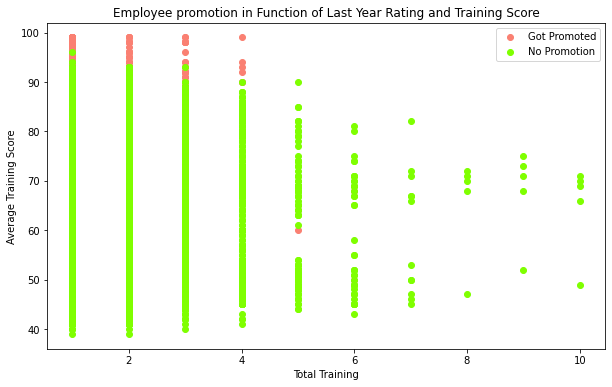

In [23]:
# Create another figure
plt.figure(figsize=(10,6))

# Create plot for person who get promoted 
plt.scatter(employee_data.jumlah_training[employee_data.dipromosikan==1], 
            employee_data.rata_rata_skor_training[employee_data.dipromosikan==1], 
            c="salmon") # axis always come as (x, y)

# Create plot for person who not to get promoted
plt.scatter(employee_data.jumlah_training[employee_data.dipromosikan==0], 
            employee_data.rata_rata_skor_training[employee_data.dipromosikan==0], 
            c='chartreuse')

# Add some helpful info
plt.title("Employee promotion in Function of Last Year Rating and Training Score")
plt.xlabel("Total Training")
plt.legend(["Got Promoted", "No Promotion"])
plt.ylabel('Average Training Score');

#### Total of employee got promoted based on education level

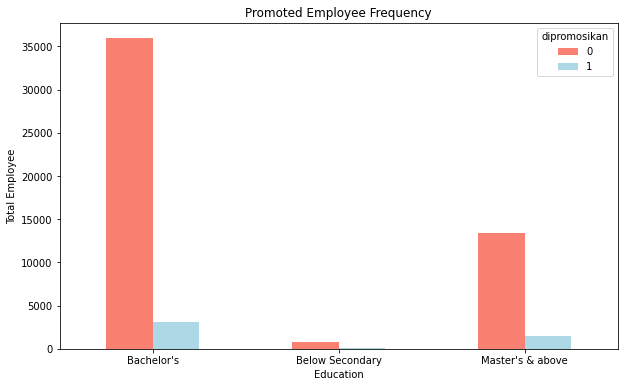

In [24]:
#Create a plot
pd.crosstab(employee_data.pendidikan, employee_data.dipromosikan).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);
#Add some attributes to it
plt.title('Promoted Employee Frequency')
plt.xlabel('Education')
plt.ylabel('Total Employee')
plt.xticks(rotation=0);

#### Total Promoted Employee Based on Awards

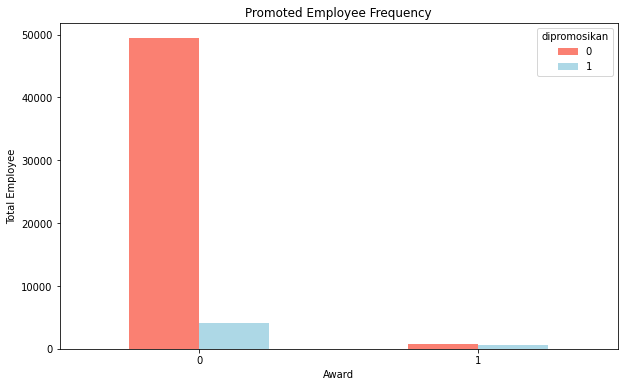

In [25]:
#Create a plot
pd.crosstab(employee_data.penghargaan, employee_data.dipromosikan).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);
#Add some attributes to it
plt.title('Promoted Employee Frequency')
plt.xlabel('Award')
plt.ylabel('Total Employee')
plt.xticks(rotation=0);

#### Total Promoted Employee Based on Recruitment

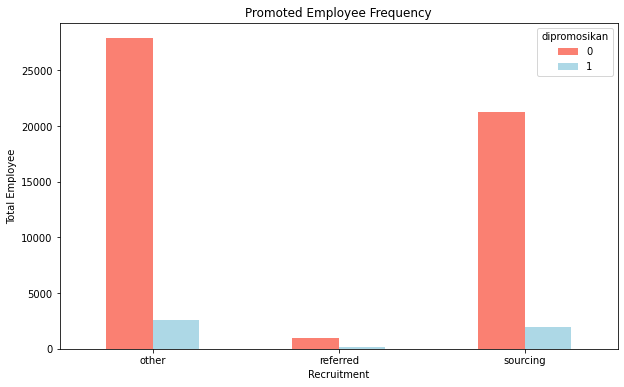

In [26]:
#Create a plot
pd.crosstab(employee_data.rekrutmen, employee_data.dipromosikan).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);
#Add some attributes to it
plt.title('Promoted Employee Frequency')
plt.xlabel('Recruitment')
plt.ylabel('Total Employee')
plt.xticks(rotation=0);

In [27]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_karyawan              54808 non-null  int64  
 1   departemen               54808 non-null  object 
 2   wilayah                  54808 non-null  object 
 3   pendidikan               54808 non-null  object 
 4   jenis_kelamin            54808 non-null  object 
 5   rekrutmen                54808 non-null  object 
 6   jumlah_training          54808 non-null  int64  
 7   umur                     54808 non-null  int64  
 8   rating_tahun_lalu        54808 non-null  float64
 9   masa_kerja               54808 non-null  int64  
 10  KPI_>80%                 54808 non-null  int64  
 11  penghargaan              54808 non-null  int64  
 12  rata_rata_skor_training  54808 non-null  int64  
 13  dipromosikan             54808 non-null  int64  
dtypes: float64(1), int64(8

### Feature Engineering

In [28]:
# Back up dataset
employee_data_2 = employee_data

In [29]:
employee_data.drop(['departemen','wilayah','pendidikan','jenis_kelamin','rekrutmen'], axis=1, inplace=True)

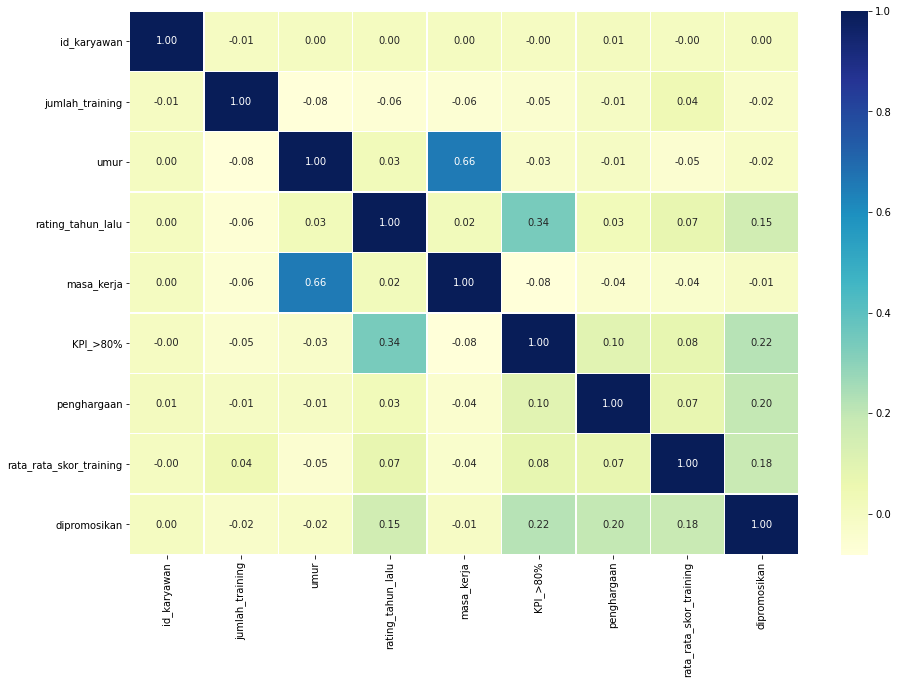

In [30]:
# Feature Correlation
corr_matrix = employee_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [31]:
# Dropping column which had less influence to promotion
employee_data.drop(['id_karyawan','jumlah_training','umur','masa_kerja'], axis=1, inplace=True)

In [32]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rating_tahun_lalu        54808 non-null  float64
 1   KPI_>80%                 54808 non-null  int64  
 2   penghargaan              54808 non-null  int64  
 3   rata_rata_skor_training  54808 non-null  int64  
 4   dipromosikan             54808 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 2.1 MB


## Machine Learning Model

In [33]:
X = employee_data.drop('dipromosikan', axis=1)

#Target variable
y = employee_data.dipromosikan

In [34]:
# Random seed for reproducibility
np.random.seed(42)

#Split into train & test set
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2)

### K-fold method

In [35]:
folding = StratifiedKFold(n_splits=10)

folding.get_n_splits(X, y)

10

In [36]:
for training_index, test_index in folding.split(X, y):
    print("Index X: ", training_index, " dan Index y: ", test_index)

Index X:  [ 5111  5139  5150 ... 54805 54806 54807]  dan Index y:  [   0    1    2 ... 5512 5513 5514]
Index X:  [    0     1     2 ... 54805 54806 54807]  dan Index y:  [ 5111  5139  5150 ... 11014 11015 11017]
Index X:  [    0     1     2 ... 54805 54806 54807]  dan Index y:  [10461 10474 10478 ... 16441 16442 16443]
Index X:  [    0     1     2 ... 54805 54806 54807]  dan Index y:  [16432 16444 16445 ... 22173 22176 22178]
Index X:  [    0     1     2 ... 54805 54806 54807]  dan Index y:  [21892 21894 21895 ... 27952 27954 27965]
Index X:  [    0     1     2 ... 54805 54806 54807]  dan Index y:  [27341 27342 27343 ... 33408 33423 33425]
Index X:  [    0     1     2 ... 54805 54806 54807]  dan Index y:  [32839 32840 32841 ... 38702 38723 38738]
Index X:  [    0     1     2 ... 54805 54806 54807]  dan Index y:  [38330 38331 38333 ... 43992 43995 44001]
Index X:  [    0     1     2 ... 54805 54806 54807]  dan Index y:  [43832 43833 43834 ... 49561 49564 49567]
Index X:  [    0     1   

## Hyperparameter Tuning

#### Initiation

In [40]:
# LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           'max_features': ['auto', 'sqrt'],
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           'bootstrap': [True, False]}

# DecisionTreeClassifier hyperparameters
dectree_grid = {'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth': [None, 3, 5, 10],
                'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
                'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
                }

# Different XGBoostClassifier hyperparameters
xgb_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
            "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
            "min_child_weight" : [ 1, 3, 5, 7 ],
            "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

### RandomSearchCV

In [41]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=folding,
                                n_iter=10,
                                random_state = 1000,
                                n_jobs = 3,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   24.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   38.4s finished


In [42]:
print("Best Hyper Parameters:\n",rs_log_reg.best_params_)
# Prediction
prediction=rs_log_reg.predict(X_val)

# Evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_val))

# Evaluation(Confusion Metrics)
print("Confusion Metrics:\n",metrics.confusion_matrix(prediction,y_val))

Best Hyper Parameters:
 {'solver': 'liblinear', 'C': 3792.690190732246}
Accuracy: 0.919357781426747
Confusion Metrics:
 [[10022   852]
 [   32    56]]


In [ ]:
# Setup random hyperparameter search for KNNClassifier
rs_xgb = RandomizedSearchCV(XGBClassifier(),
                           param_distributions=xgb_grid,
                           cv=folding,
                           n_iter=10,
                           random_state = 1000,
                           n_jobs = 4,
                           verbose=True)

# Fit random hyperparameter search model
rs_xgb.fit(X_train, y_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.8min


In [ ]:
print("Best Hyper Parameters:\n",rs_xgb.best_params_)
# Prediction
prediction=rs_xgb.predict(X_val)

# Evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_val))

# Evaluation(Confusion Metrics)
print("Confusion Metrics:\n",metrics.confusion_matrix(prediction,y_val))

In [61]:
# Saving the model
filename = 'finalized_model.sav'
pickle.dump(rs_xgb, open(filename, 'wb'))